In [1]:
from keras.datasets import mnist
#loading the mnist dataset

(train_data, train_target),(test_data, test_target) = mnist.load_data()
#spliting the dataset into training and testing

d:\programs\anaconda\envs\tensorflow_cpu\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
d:\programs\anaconda\envs\tensorflow_cpu\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
d:\programs\anaconda\envs\tensorflow_cpu\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)
Using TensorFlow backend.
d:\programs\anaconda\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\programs\anaconda\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be underst

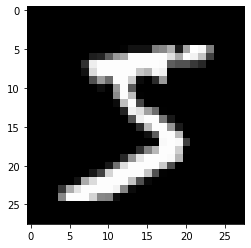

In [2]:
from matplotlib import pyplot as plt

plt.imshow(train_data[0],cmap='gray')
plt.show()

In [3]:
print(train_target[0])

5


In [4]:
train_data= train_data / 255.0 
test_data=test_data/255.0
#Scaling the 0-255 gray image to 0-1 (Requirement before training the Neural Network)

In [5]:
from keras.models import Sequential
#loading Sequential model from keras
from keras.layers import Flatten,Dense
#loading Flatten and Dense layers from keras

model = Sequential()
#creating a Sequential type neural network (a empty neural network, add layer by layer)
model.add(Flatten(input_shape=(28, 28)))
#a flatten layer to flatten up the 28x28 input image into 784 inputs
model.add(Dense(512, activation='relu'))
#1st Hidden layer with 512 Neurons
model.add(Dense(256, activation='relu'))
#2nd Hidden layer with 256 Neurons
model.add(Dense(10, activation='softmax'))
#output layer with 10 output neurons
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#compiling the neural network with necessary parameters

model.summary()
#neural network architecture and parameters






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.utils import to_categorical

train_target=to_categorical(train_target)
#convering the labels into a categorical representation

history=model.fit(train_data, train_target, epochs=20)
#training the neural network for 50 epochs

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.1860 - acc: 0.9436
Epoch 2/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.0783 - acc: 0.9754
Epoch 3/20
60000/60000 [==============================] - 12s 196us/step - loss: 0.0546 - acc: 0.9824
Epoch 4/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.0405 - acc: 0.9863
Epoch 5/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.0327 - acc: 0.9893
Epoch 6/20
60000/60000 [==============================] - ETA: 0s - loss: 0.0286 - acc: 0.990 - 12s 197us/step - loss: 0.0286 - acc: 0.9907
Epoch 7/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.0228 - acc: 0.9927
Epoch 8/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.0204 - acc: 0.9931
Epoch 9/20
60000/60000 [===========================

In [ ]:
results=model.predict(test_data)
print(results[:10])
#testing and getting results using unseen data

In [ ]:
import numpy as np
results=np.argmax(results,axis=1)

In [ ]:
print(test_target[:10])
print(results[:10])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_target,results)
print('Accuracy:',accuracy)
#getting the accuracy between the actual and predicted results

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
#visualizing the loss

In [ ]:
plt.plot(history.history['acc'])
plt.xlabel('# epochs')
plt.ylabel('accuracy')
#visualizing the accuracy

In [ ]:
model.save_weights('FFNN-MNIST.h5')